In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [19]:
# Preprocessing:
numerical_columns = df.select_dtypes(include=[np.number]).columns
data_cleaned = df[numerical_columns].dropna() #dropping the missing values

In [20]:
X = data_cleaned.values

# Define a function to calculate the sum of least square error for different values of k
def calculate_sse(X, max_k):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)  # Inertia is the SSE
    return sse

# Calculate sum of least square for k values from 1 to 10
max_k = 10
sse = calculate_sse(X, max_k)

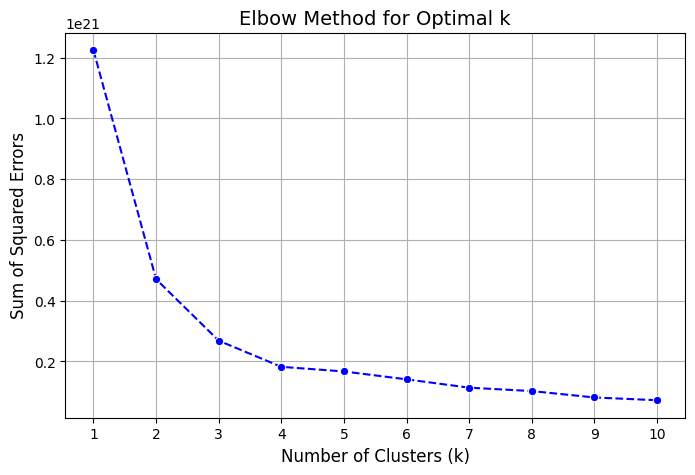

In [21]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, max_k + 1), y=sse, marker="o", linestyle="--", color="blue")
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors', fontsize=12)
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.show()

In [22]:
# Optimal number of clusters to determine from the elbow point
optimal_k = 4  

# Apply k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [23]:
# Create a DataFrame for visualization
data_visual = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
data_visual["Cluster"] = y_kmeans


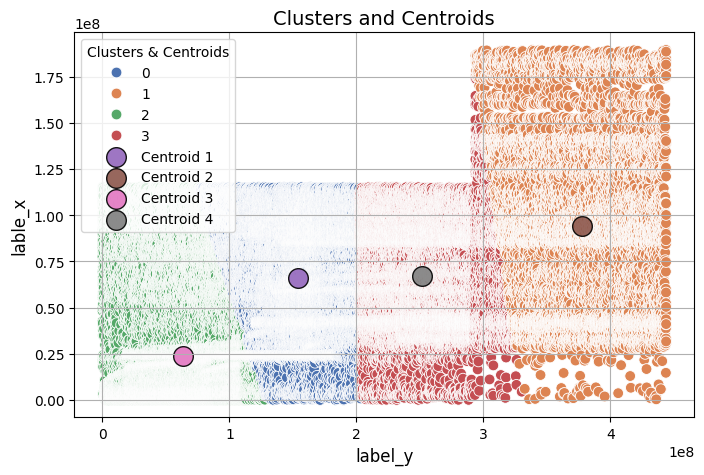

In [24]:
# Plot the clusters and centroids
plt.figure(figsize=(8, 5))

# Plot clusters
scatter = sns.scatterplot(
    x="Feature_1",
    y="Feature_2",
    hue="Cluster",
    palette="deep",
    data=data_visual,
    s=60
)

# Plot centroids as separate data points with unique colors
for idx, centroid in enumerate(centroids):
    plt.scatter(
        centroid[0], centroid[1],
        s=200, label=f"Centroid {idx + 1}", alpha=0.9, edgecolor='black', color=f'C{idx+optimal_k}'
    )

# display the plot
plt.title('Clusters and Centroids', fontsize=14)
plt.xlabel('label_y', fontsize=12)
plt.ylabel('lable_x', fontsize=12)
plt.legend(title='Clusters & Centroids', loc='upper left', fontsize=10)
plt.grid()
plt.show()

In [28]:
"""Explanation:K-means clustering groups data into clusters based on their similarity. Firstly, calculated the sum of least square errors for different numbers of clusters (k), which measures how far data points are from their cluster centers. The elbow method helps find the best k by looking for a point where adding more clusters doesn’t reduce the sum of least square error much. After finding the optimal k, applied the k-means algorithm to group the data. Finally, visualized the clusters and their centroids, with each cluster in a different color."""

'Explanation:K-means clustering groups data into clusters based on their similarity. Firstly, calculated the sum of least square errors for different numbers of clusters (k), which measures how far data points are from their cluster centers. The elbow method helps find the best k by looking for a point where adding more clusters doesn’t reduce the sum of least square error much. After finding the optimal k, applied the k-means algorithm to group the data. Finally, visualized the clusters and their centroids, with each cluster in a different color.'